In [10]:
import seaborn
import matplotlib.pyplot as plt
import numpy as np
from main.data_preprocessing import load_data, DataSet
from main.constants import DATA_PATH, NUM_2_CHARACTER
from main.vgg16_model import Vgg16

In [2]:
# init data and model
data = load_data(data_id='big', data_path=DATA_PATH)
model = Vgg16(input_shape=data.x_train.shape[1:], n_classes=data.n_classes, model_id='vgg_001')

Predicting with vgg_model...
Predicting with top_model...


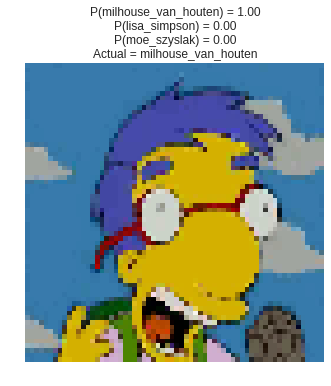

In [76]:
sample_idx = np.random.randint(0, data.x_test.shape[0], 1)[0]
y_test_hat = model.predict(data.x_test[[sample_idx], :, :, :])[0, :]

probabilities = y_test_hat / y_test_hat.sum()
top_idxs = probabilities.argsort()[-3:][::-1]
title = '\n'.join(['P({}) = {:.2f}'.format(NUM_2_CHARACTER[data.label_binarizer.classes_[idx]], probabilities[idx]) for idx in top_idxs])
title += '\nActual = {}'.format(data.labels_char_test[sample_idx])

image = data.x_test[sample_idx, :, :, :]
plt.imshow(image)
plt.axis("off")
plt.title(title)
plt.show()